<div style="line-height:0.5">
<h1 style="color:#EC804A "> Logistic regression trials 3 </h1>
<div style="margin-top: -4px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> Cython + joblib dump and retrieve + RandomizedSearchCV + ConvergenceWarning
</span>
</div>

In [5]:
%load_ext Cython 
# To avoid "UsageError: Cell magic `%%cython` not found."

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [6]:
%%cython

import copy
import joblib
import numpy as np
cimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import hamming_loss, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings

In [41]:
class training:
    @ignore_warnings(category=ConvergenceWarning)
    def __init__(self, name):
        self.name = name
        self.class_weights = {'caress':1,'touch':1, 'hug':1,'squeeze':1, 'choke':1, 'shove':1}

        #self.logreg = LogisticRegression(C=1e4, solver='lbfgs', warm_start=False, max_iter=100000000000000, tol=0.00001, multi_class='multinomial',class_weight=self.class_weights)
        self.logreg = LogisticRegression(C=1e4, solver='newton-cg', warm_start=True, max_iter=2500000000000000, tol=0.00001, multi_class='multinomial',class_weight=self.class_weights)
        
        #250000000000000
    @ignore_warnings(category=ConvergenceWarning)
    def training_logistic_regression(self):
        my_dataset = pd.read_csv("./touch_dataset_oimi_january_22.csv", skiprows=None, engine='python')
        Y = my_dataset.pop('Type_of_contact')
        X_train, X_test, Y_train, Y_test = tts(my_dataset, Y, test_size=0.15)
        self.logreg.fit(X_train, Y_train)
        print("ok,done")
        print(X_train[:10])
        print()
        print(self.logreg)
        filename = './touch_training_oimi_january_22.sav'
        joblib.dump(self.logreg, filename)

    def get_logreg(self):
        return self.logreg

In [42]:
tol = 0.0001

In [43]:
## Train the oimi class
on = training(name="train#1")
on.training_logistic_regression()

ok,done
      Min0  Min1  Min2  Min3  Min4  Max0  Max1  Max2  Max3  Max4  ...  \
2529   0.2   0.2   0.3   0.2   0.2   0.2   0.2   0.3   0.2   0.2  ...   
1448   0.2   0.3   0.3   0.2   0.2   0.2   0.3   0.3   0.2   0.2  ...   
1485   0.3   0.3   0.4   0.2   0.3   0.3   0.4   0.4   0.2   0.3  ...   
1962   0.5   0.5   0.5   0.6   0.4   0.6   0.6   0.5   0.7   0.5  ...   
2281   0.2   0.2   0.3   0.2   0.2   0.3   0.2   0.3   0.2   0.2  ...   
601    0.2   0.2   0.3   0.2   0.2   0.2   0.2   0.3   0.2   0.2  ...   
423    0.5   0.5   0.9   0.3   0.6   0.5   0.5   1.0   0.4   0.6  ...   
2643   0.2   0.2   0.3   0.2   0.2   0.2   0.3   0.3   0.2   0.3  ...   
830    0.2   0.2   0.3   0.2   0.2   0.2   0.2   0.3   0.2   0.2  ...   
1838   0.5   0.5   0.7   0.3   0.7   0.6   0.5   0.7   0.4   0.7  ...   

      Peaksen2peak0  Peaksen2peak1  Peaksen3peak0  Peaksen3peak1  \
2529              0              0              0              0   
1448              0              0              0   

In [44]:
#%%script echo skipping
aa = on.get_logreg()
aa

LogisticRegression(C=10000.0,
                   class_weight={'caress': 1, 'choke': 1, 'hug': 1, 'shove': 1,
                                 'squeeze': 1, 'touch': 1},
                   max_iter=2500000000000000, multi_class='multinomial',
                   solver='newton-cg', tol=1e-05, warm_start=True)

In [58]:
%%cython
## Import should be in the cell 
from cpython cimport array
cimport cython
import numpy as np
cimport numpy as np
import joblib
cdef extern from"Python.h":
    object PyList(float *s, Py_ssize_t leng)
    
cdef extern from "math.h":
    float sqrt(float m)
    float fabs(float m)
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef float cmin(float[:] a):
    cdef:
        int c
        float mini
        Py_ssize_t la = len(a)
    mini = a[0]
    with nogil:
        for c in range(1,la):
            if (a[c] < mini): 
                mini = a[c]
    return mini
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef float cmax(float[:] a):
    cdef int c 
    cdef float maxi
    cdef Py_ssize_t la = len(a)
    maxi = a[0]
    with nogil:
        for c in range(1,la):
            if (a[c] > maxi):
                maxi = a[c]
    return maxi
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef float cavg(float[:] a):
    cdef float sum = 0
    cdef int N = len(a)
    with nogil:
        for i in range(N):
            sum += a[i]
    return sum/N
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef float cstdDev(float[:] a):
    cdef Py_ssize_t i
    cdef Py_ssize_t n = len(a)
    cdef float m = 0.0
    cdef float v = 0.0
    with nogil:
        for i in range(n):
            m+=a[i]
    m /= n    
    with nogil:
        for i in range(n):
            v += (a[i] - m)**2
    return sqrt(v / n)
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef dict cplat(float[:] b):
    cdef Py_ssize_t siz = len(b)
    cdef int i = 0
    cdef int j = 0  
    cdef int k = 0  
    cdef int cont = 0  
    cdef bint up = 0
    cdef dict res = dict()
    cdef float prev
    cdef float val
    for j in range(1, siz):
        prev, val = b[j - 1], b[j]
        if up and val < prev:
            res[k]=cont
            k+=1
            up = 0
            cont = 0
        if (val > prev and fabs(val - prev) >= 0.2 and cont==0) or (val > prev and up) or (val == prev and cont != 0):
            cont += 1
            i = j
            up = 1
        if j == siz - 1:
            if up:
                res[k]=cont
            if not res:
                res[k]=cont
            return res      
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef array.array counterpeak(dict urca):
    cdef array.array num_peaks = array.array('i', [0,0,0,0,0])
    for k in urca.keys():
        if urca[k]==1:
            num_peaks[0]+=1
        elif urca[k]==2:
            num_peaks[1]+=1
        elif urca[k]==3: 
            num_peaks[2]+=1
        elif urca[k]==4:
            num_peaks[3]+=1
        elif urca[k]>=5:
            num_peaks[4]+=1
    return num_peaks
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef conv(dict di):
    cdef bint fla= 0
    d = dict({0: 0})
    if di is None:
        fla = 1 
    if fla == 1: 
        return fla,d
    if fla == 0:
        return fla,di  

def ccmax(aa):
    res = cmax(aa)
    return res

def ccmin(list_min):
    res = cmin(list_min)
    return res

def ccavg(list_avg):
    res = cavg(list_avg)
    return res

def ccstdev(list_stdev):
    res = cstdDev(list_stdev)
    return res

def ccplat(list_plat):
    res = cplat(list_plat)
    return res

def ccounter(dict_counter):
    res = counterpeak(dict_counter)
    return res

def cconv(dict_conv):
    res1,res2 = conv(dict_conv)
    return res1,res2

cdef cfunz_min(tlist):
    cdef float[:] prot0_view = tlist
    res = ccmin(prot0_view)
    return res
cdef cfunz_max(tlist):
    cdef float[:] prot0_view = tlist
    res = ccmax(prot0_view)
    return res
cdef cfunz_avg(tlist):
    cdef float[:] prot0_view = tlist
    res = ccavg(prot0_view)
    return res
cdef cfunz_std(tlist):
    cdef float[:] prot0_view = tlist
    res = ccstdev(prot0_view)
    return res
cdef cfunz_plat(tlist):
    cdef float[:] prot0_view = tlist
    res = ccplat(prot0_view)
    return res


def f0(ss_list):
    aa = cfunz_plat(ss_list)
    return aa
    
def f1(s_list):
    ll = cfunz_plat(s_list)
    return ll

def calc_measures_car_1(caresses_total, mins_caresses, maxs_caresses, means_caresses, stds_caresses, peaks_caresses):
    for i in range(5):
        for j in range(len(caresses_total[i])):
            mins_caresses[i].append(cfunz_min(caresses_total[i][j]))
            maxs_caresses[i].append(cfunz_max(caresses_total[i][j]))
            means_caresses[i].append(cfunz_avg(caresses_total[i][j]))
            stds_caresses[i].append(cfunz_std(caresses_total[i][j]))
            pla = cfunz_plat(caresses_total[i][j])
            resp,da = cconv(pla)
            n_peaks = ccounter(da)
            peaks_caresses[i].append(n_peaks)
    return mins_caresses, maxs_caresses, means_caresses, stds_caresses, peaks_caresses
def calc_measures_hug_1(hugs_total, mins_hugs, maxs_hugs, means_hugs, stds_hugs, peaks_hugs):
    for i in range(5):
        for j in range(len(hugs_total[i])):
            mins_hugs[i].append(cfunz_min(hugs_total[i][j]))
            maxs_hugs[i].append(cfunz_max(hugs_total[i][j]))
            means_hugs[i].append(cfunz_avg(hugs_total[i][j]))
            stds_hugs[i].append(cfunz_std(hugs_total[i][j]))
            pla = cfunz_plat(hugs_total[i][j])
            resp,da = cconv(pla)
            n_peaks = ccounter(da)
            peaks_hugs[i].append(n_peaks)
    return mins_hugs, maxs_hugs, means_hugs, stds_hugs, peaks_hugs
def calc_measures_to_1(touches_total, mins_touches, maxs_touches, means_touches, stds_touches, peaks_touches):
    for i in range(5):
        for j in range(len(touches_total[i])):
            mins_touches[i].append(cfunz_min(touches_total[i][j]))
            maxs_touches[i].append(cfunz_max(touches_total[i][j]))
            means_touches[i].append(cfunz_avg(touches_total[i][j]))
            stds_touches[i].append(cfunz_std(touches_total[i][j]))
            pla = cfunz_plat(touches_total[i][j])
            resp,da = cconv(pla)
            n_peaks = ccounter(da)
            peaks_touches[i].append(n_peaks)
    return mins_touches, maxs_touches, means_touches, stds_touches, peaks_touches
def calc_measures_cho_1(choks_total, mins_choks, maxs_choks, means_choks, stds_choks, peaks_choks):
    for i in range(5):
        for j in range(len(choks_total[i])):
            mins_choks[i].append(cfunz_min(choks_total[i][j]))
            maxs_choks[i].append(cfunz_max(choks_total[i][j]))
            means_choks[i].append(cfunz_avg(choks_total[i][j]))
            stds_choks[i].append(cfunz_std(choks_total[i][j]))
            pla = cfunz_plat(choks_total[i][j])
            resp,da = cconv(pla)
            n_peaks = ccounter(da)
            peaks_choks[i].append(n_peaks)
    return mins_choks, maxs_choks, means_choks, stds_choks, peaks_choks
def calc_measures_squ_1(squeezes_total, mins_squeezes, maxs_squeezes, means_squeezes, stds_squeezes, peaks_squeezes):
    for i in range(5):
        for j in range(len(squeezes_total[i])):
            mins_squeezes[i].append(cfunz_min(squeezes_total[i][j]))
            maxs_squeezes[i].append(cfunz_max(squeezes_total[i][j]))
            means_squeezes[i].append(cfunz_avg(squeezes_total[i][j]))
            stds_squeezes[i].append(cfunz_std(squeezes_total[i][j]))
            pla = cfunz_plat(squeezes_total[i][j])
            resp,da = cconv(pla)
            n_peaks = ccounter(da)
            peaks_squeezes[i].append(n_peaks)
    return mins_squeezes, maxs_squeezes, means_squeezes, stds_squeezes, peaks_squeezes
def calc_measures_sho_1(shoves_total, mins_shoves, maxs_shoves, means_shoves, stds_shoves, peaks_shoves):
    for i in range(5):
        for j in range(len(shoves_total[i])):
            mins_shoves[i].append(cfunz_min(shoves_total[i][j]))
            maxs_shoves[i].append(cfunz_max(shoves_total[i][j]))
            means_shoves[i].append(cfunz_avg(shoves_total[i][j]))
            stds_shoves[i].append(cfunz_std(shoves_total[i][j]))
            pla = cfunz_plat(shoves_total[i][j])
            resp,da = cconv(pla)
            n_peaks = ccounter(da)
            peaks_shoves[i].append(n_peaks)
    return mins_shoves, maxs_shoves, means_shoves, stds_shoves, peaks_shoves

############################################################################################
cdef float crange(float[:] numbers, int amount):
    cdef int i = 1
    cdef float mini=0.0
    cdef maxi=0.0
    cdef diff=0.0 
    mini = numbers[0]
    maxi = numbers[0]
    for i in range(amount):
        if numbers[i] < mini:
            mini = numbers[i]
        if maxi < numbers[i]:
            maxi = numbers[i]
    diff = maxi - mini
    return diff

cdef dict cplat_mpu(int[:] b):
    cdef Py_ssize_t siz = len(b)
    cdef int i = 0
    cdef int j = 0  
    cdef int k = 0  
    cdef int cont = 0  
    cdef bint up = 0
    cdef dict res = dict()
    cdef float prev
    cdef float val	
    for j in range(1, siz):
        prev, val = b[j - 1], b[j]
        if up and val < prev:
            res[k]=cont
            k+=1
            up = 0
            cont = 0
        if (val > prev and fabs(val - prev) >= 50 and cont==0) or (val > prev and up) or (val == prev and cont != 0):
            cont += 1
            i = j
            up = 1
        if j == siz - 1:
            if up:
                res[k]=cont	
            if not res:
                res[k]=cont	
    return res

##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef float cavg2(int[:] a):
    cdef int sum = 0
    cdef int N = len(a)
    with nogil:
        for i in range(N):
            sum += a[i]
    return sum/N

@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
cdef float cstdDev2(int[:] a):
    cdef Py_ssize_t i
    cdef Py_ssize_t n = len(a)
    cdef int m = 0
    cdef int v = 0
    with nogil:
        for i in range(n):
            m+=a[i]
    m /= n    
    with nogil:
        for i in range(n):
            v += (a[i] - m)**2
    return sqrt(v / n)
##########################################
@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
def ccavg2(list_avg2):
    res = cavg2(list_avg2)
    return res
cdef cfunz_avg2(tlist):
    cdef int[:] prot0_view = tlist
    res = ccavg2(prot0_view)
    return res

@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative indexing
def ccstd2(list_std2):
    res = cstdDev2(list_std2)
    return res
cdef cfunz_std2(tlist):
    cdef int[:] prot0_view = tlist
    res = ccstd2(prot0_view)
    return res

@cython.boundscheck(False)
def prova10(ss_list):
    aa = cfunz_std2(ss_list)
    return aa

@cython.boundscheck(False)
def calc_measures_mpus_car_1(caresses_mpu1, avg_mpu1_caresses, std_mpu1_caresses):
    for i in range(1):
        for j in range(len(caresses_mpu1[i])):
            avg_mpu1_caresses[i].append(cfunz_avg2(caresses_mpu1[i][j]))
            std_mpu1_caresses[i].append(cfunz_std2(caresses_mpu1[i][j]))
    return avg_mpu1_caresses, std_mpu1_caresses

@cython.boundscheck(False)
def calc_measures_mpus_car_2(caresses_mpu2, avg_mpu2_caresses, std_mpu2_caresses):
    for i in range(1):
        for j in range(len(caresses_mpu2[i])):
            avg_mpu2_caresses[i].append(cfunz_avg2(caresses_mpu2[i][j]))
            std_mpu2_caresses[i].append(cfunz_std2(caresses_mpu2[i][j]))
    return avg_mpu2_caresses, std_mpu2_caresses

@cython.boundscheck(False)
def calc_measures_mpus_squ_1(squeezes_mpu1, avg_mpu1_squeezes, std_mpu1_squeezes):
    for i in range(1):
        for j in range(len(squeezes_mpu1[i])):
            avg_mpu1_squeezes[i].append(cfunz_avg2(squeezes_mpu1[i][j]))
            std_mpu1_squeezes[i].append(cfunz_std2(squeezes_mpu1[i][j]))
    return avg_mpu1_squeezes, std_mpu1_squeezes

@cython.boundscheck(False)
def calc_measures_mpus_squ_2(squeezes_mpu2, avg_mpu2_squeezes, std_mpu2_squeezes):
    for i in range(1):
        for j in range(len(squeezes_mpu2[i])):
            avg_mpu2_squeezes[i].append(cfunz_avg2(squeezes_mpu2[i][j]))
            std_mpu2_squeezes[i].append(cfunz_std2(squeezes_mpu2[i][j]))
    return avg_mpu2_squeezes, std_mpu2_squeezes

@cython.boundscheck(False)
def calc_measures_mpus_tou_1(touches_mpu1, avg_mpu1_touches, std_mpu1_touches):
    for i in range(1):
        for j in range(len(touches_mpu1[i])):
            avg_mpu1_touches[i].append(cfunz_avg2(touches_mpu1[i][j]))
            std_mpu1_touches[i].append(cfunz_std2(touches_mpu1[i][j]))
    return avg_mpu1_touches, std_mpu1_touches

@cython.boundscheck(False)
def calc_measures_mpus_tou_2(touches_mpu2, avg_mpu2_touches, std_mpu2_touches):
    for i in range(1):
        for j in range(len(touches_mpu2[i])):
            avg_mpu2_touches[i].append(cfunz_avg2(touches_mpu2[i][j]))
            std_mpu2_touches[i].append(cfunz_std2(touches_mpu2[i][j]))
    return avg_mpu2_touches, std_mpu2_touches

@cython.boundscheck(False)
def calc_measures_mpus_hug_1(hugs_mpu1, avg_mpu1_hugs, std_mpu1_hugs):
    for i in range(1):
        for j in range(len(hugs_mpu1[i])):
            avg_mpu1_hugs[i].append(cfunz_avg2(hugs_mpu1[i][j]))
            std_mpu1_hugs[i].append(cfunz_std2(hugs_mpu1[i][j]))
    return avg_mpu1_hugs, std_mpu1_hugs

@cython.boundscheck(False)
def calc_measures_mpus_hug_2(hugs_mpu2, avg_mpu2_hugs, std_mpu2_hugs):
    for i in range(1):
        for j in range(len(hugs_mpu2[i])):
            avg_mpu2_hugs[i].append(cfunz_avg2(hugs_mpu2[i][j]))
            std_mpu2_hugs[i].append(cfunz_std2(hugs_mpu2[i][j]))
    return avg_mpu2_hugs, std_mpu2_hugs

@cython.boundscheck(False)
def calc_measures_mpus_cho_1(choks_mpu1, avg_mpu1_choks, std_mpu1_choks):
    for i in range(1):
        for j in range(len(choks_mpu1[i])):
            avg_mpu1_choks[i].append(cfunz_avg2(choks_mpu1[i][j]))
            std_mpu1_choks[i].append(cfunz_std2(choks_mpu1[i][j]))
    return avg_mpu1_choks, std_mpu1_choks

@cython.boundscheck(False)
def calc_measures_mpus_cho_2(choks_mpu2, avg_mpu2_choks, std_mpu2_choks):
    for i in range(1):
        for j in range(len(choks_mpu2[i])):
            avg_mpu2_choks[i].append(cfunz_avg2(choks_mpu2[i][j]))
            std_mpu2_choks[i].append(cfunz_std2(choks_mpu2[i][j]))
    return avg_mpu2_choks, std_mpu2_choks

@cython.boundscheck(False)
def calc_measures_mpus_sho_1(shoves_mpu1, avg_mpu1_shoves, std_mpu1_shoves):
    for i in range(1):
        for j in range(len(shoves_mpu1[i])):
            avg_mpu1_shoves[i].append(cfunz_avg2(shoves_mpu1[i][j]))
            std_mpu1_shoves[i].append(cfunz_std2(shoves_mpu1[i][j]))
    return avg_mpu1_shoves, std_mpu1_shoves

@cython.boundscheck(False)
def calc_measures_mpus_sho_2(shoves_mpu2, avg_mpu2_shoves, std_mpu2_shoves):
    for i in range(1):
        for j in range(len(shoves_mpu2[i])):
            avg_mpu2_shoves[i].append(cfunz_avg2(shoves_mpu2[i][j]))
            std_mpu2_shoves[i].append(cfunz_std2(shoves_mpu2[i][j]))
    return avg_mpu2_shoves, std_mpu2_shoves

###############################################################################################
cdef calculate_single_sample_new(new1,new2,new3,new4,new5,giro_l,giro_r):
    print("enter in calculate")
    girox_l = np.asarray(giro_l, dtype=np.int32)
    girox_r = np.asarray(giro_r, dtype=np.int32)
    cdef int[:] std_g_l=girox_l
    cdef int[:] std_g_r=girox_r	
    prot0 = np.asarray(new1, dtype=np.float32)
    prot1 = np.asarray(new2, dtype=np.float32)
    prot2 = np.asarray(new3, dtype=np.float32)
    prot3 = np.asarray(new4, dtype=np.float32)
    prot4 = np.asarray(new5, dtype=np.float32)

    # a bytes-like object is required, not 'list'
    cdef float[:] prot0_view = prot0
    cdef float[:] prot1_view = prot1
    cdef float[:] prot2_view = prot2
    cdef float[:] prot3_view = prot3
    cdef float[:] prot4_view = prot4
    min0,min1,min2,min3,min4 = cmin(prot0_view), cmin(prot1_view), cmin(prot2_view), cmin(prot3_view), cmin(prot4_view)
    max0,max1,max2,max3,max4 = cmax(prot0_view), cmax(prot1_view), cmax(prot2_view), cmax(prot3_view), cmax(prot4_view)
    avg0,avg1,avg2,avg3,avg4 = cavg(prot0_view), cavg(prot1_view), cavg(prot2_view), cavg(prot3_view), cavg(prot4_view) 
    std0,std1,std2,std3,std4 = cstdDev(prot0_view), cstdDev(prot1_view), cstdDev(prot2_view), cstdDev(prot3_view), cstdDev(prot4_view)
    range0,range1,range2,range3,range4 = crange(prot0_view,10),crange(prot1_view,10),crange(prot2_view,10),
            crange(prot3_view,10),crange(prot4_view,10)	
    perc0,perc1,perc2,perc3,perc4 = np.percentile(prot0_view,97),np.percentile(prot1_view,97),np.percentile(prot2_view,97),
            np.percentile(prot3_view,97),np.percentile(prot4_view,97),


    pla0, pla1, pla2, pla3, pla4 = cplat(prot0_view), cplat(prot1_view), cplat(prot2_view) , cplat(prot3_view), cplat(prot4_view)
    pla_left = cplat_mpu(std_g_l)
    pla_right = cplat_mpu(std_g_r)

    resp_left, da_left = conv(pla_left)
    resp_right, da_right = conv(pla_right)

    num_peaks_l = counterpeak(da_left)
    num_peaks_r = counterpeak(da_right)

    resp0,da0 = conv(pla0)
    resp1,da1 = conv(pla1)
    resp2,da2 = conv(pla2)
    resp3,da3 = conv(pla3)
    resp4,da4 = conv(pla4)

    num_peaks0 = counterpeak(da0) 
    num_peaks1 = counterpeak(da1) 
    num_peaks2 = counterpeak(da2)
    num_peaks3 = counterpeak(da3)
    num_peaks4 = counterpeak(da4)

    '''ddp2 = np.array([[max0,max1,max2,max3,max4,avg0,avg1,avg2,avg3,avg4,std0,std1,std2,std3,std4,
        num_peaks0[0],num_peaks0[1],num_peaks0[2],num_peaks0[3],num_peaks0[4], 
        num_peaks1[0],num_peaks1[1],num_peaks1[2],num_peaks1[3],num_peaks1[4], 
        num_peaks2[0],num_peaks2[1],num_peaks2[2],num_peaks2[3],num_peaks2[4], 
        num_peaks3[0],num_peaks3[1],num_peaks3[2],num_peaks3[3],num_peaks3[4], 
        num_peaks4[0],num_peaks4[1],num_peaks4[2],num_peaks4[3],num_peaks4[4]]])'''
    
    #then add warp!!! also in making_new
    #tw0=warp(sample_quiet0,prot0_view)
    #tw1=warp(sample_quiet1,prot1_view)
    #tw2=warp(sample_quiet2,prot2_view)
    #tw3=warp(sample_quiet3,prot3_view)
    #tw4=warp(sample_quiet4,prot4_view)
    
    std_gir_l = cstdDev2(girox_l)
    std_gir_r = cstdDev2(girox_r)
    avg_gir_l = cavg2(girox_l)
    avg_gir_r = cavg2(girox_r)
    
    np.set_printoptions(formatter={'float_kind':'{:f}'.format})

    #ddp2 = np.array([[max0,max1,max2,max3,max4,avg0,avg1,avg2,avg3,avg4,std0,std1,std2,std3,std4]])

    '''ddp2 = np.array([[max0,max1,max2,max3,max4,avg0,avg1,avg2,avg3,avg4,
    std0,std1,std2,std3,std4,std_gir_l,std_gir_r,range0,range1,range2,range3,range4,
    tw0,tw1,tw2,tw3,tw4,num_peaks_l[0],num_peaks_r[0],
    perc0,perc1,perc2,perc3,perc4]])'''
    
    '''
    ddp2 = np.array([[
        max0,max1,max2,max3,max4,
        avg0,avg1,avg2,avg3,avg4,
        std0,std1,std2,std3,std4,
        num_peaks0[0],num_peaks0[1],
        num_peaks1[0],num_peaks1[1],
        num_peaks2[0],num_peaks2[1],
        num_peaks3[0],num_peaks3[1],
        num_peaks4[0],num_peaks4[1],
        range0,range1,range2,range3,range4,
        num_peaks_l[0],num_peaks_r[0],
        
        std_gir_l, std_gir_r
        #tw0,tw1,tw2,tw3,tw4,
        #num_peaks0[0],#num_peaks0[4],
        #num_peaks1[0],#num_peaks1[4],
        #num_peaks2[0],#num_peaks2[4],
        #num_peaks3[0],#num_peaks3[4],
        #num_peaks4[0]#num_peaks4[4],
        ]])

    #ddp2 = np.array([[max0,max1,max2,max3,max4,avg0,avg1,avg2,avg3,avg4,
    #std0,std1,std2,std3,std4,
    #num_peaks0[0],num_peaks0[4],
    #num_peaks1[0],num_peaks1[4],
    #num_peaks2[0],num_peaks2[4],
    #num_peaks3[0],num_peaks3[4],
    #num_peaks4[0],num_peaks4[4],
    #std_gir_l, std_gir_r]])
    '''
    ddp2 = np.array([[
        min0,min1,min2,min3,min4,
        max0,max1,max2,max3,max4,
        avg0,avg1,avg2,avg3,avg4,
        std0,std1,std2,std3,std4,
        range0,range1,range2,range3,range4,
        num_peaks0[0],num_peaks0[1],
        num_peaks1[0],num_peaks1[1],
        num_peaks2[0],num_peaks2[1],
        num_peaks3[0],num_peaks3[1],
        num_peaks4[0],num_peaks4[1],     
        avg_gir_l, avg_gir_r,
        std_gir_l, std_gir_r
        ]])    
    print("Im calculating ddp2 ddp2")
    print(ddp2)
    print()
    loaded_model = joblib.load("./touch_training_oimi_january_22.sav")
    perceived_interaction = loaded_model.predict(ddp2)
    print("perceived_interaction!")
    print(perceived_interaction)
    return perceived_interaction

def calculate_single_sample(new1,new2,new3,new4,new5,giro_l,giro_r):
    res = calculate_single_sample_new(new1,new2,new3,new4,new5,giro_l,giro_r)
    return res



In file included from /home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1940,
                 from /home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /home/notto4/.cache/ipython/cython/_cython_magic_1af375a0af790c1741c2a3e77fa6e773.c:792:
/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


In [59]:
new1 = [0.27, 0.22, 0.20, 0.20, 0.21, 0.25, 0.25, 0.22, 0.20, 0.20, 0.20]
new2 = [0.24,0.23,0.22,0.22,0.22,0.24,0.24,0.22,0.23,0.22,0.22]
new3 = [0.28,0.27,0.27,0.27,0.28,0.28,0.28,0.27,0.27,0.27,0.27]
new4 = [0.22,0.21,0.21,0.22,0.21,0.22,0.21,0.22,0.22,0.22,0.22]
new5 = [0.22, 0.18, 0.18, 0.18, 0.19, 0.25, 0.25, 0.21, 0.18, 0.18, 0.18]
giro_l = [73, 112, -25, -3, 97, 74, -10, 6, 101, 115, 115]
giro_r = [-30, -91, -218, -242, -98, -85, -126, -144, -157, -223, -223]

In [60]:
#%%script echo skipping
predic = calculate_single_sample(new1, new2, new3, new4, new5, giro_l, giro_r)
predic

enter in calculate
Im calculating ddp2 ddp2
[[0.200000 0.220000 0.270000 0.210000 0.180000 0.270000 0.240000 0.280000
  0.220000 0.250000 0.220000 0.227273 0.273636 0.216364 0.200000 0.024121
  0.008624 0.004810 0.004810 0.026968 0.070000 0.020000 0.010000 0.010000
  0.070000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
  0.000000 0.000000 0.000000 59.545456 -148.818176 53.240448 66.879814]]

perceived_interaction!
['hug']


/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['hug'], dtype=object)

In [61]:
class_weights = {'caress':1,'touch':1, 'hug':1,'squeeze':1, 'choke':1}

logreg = LogisticRegression(C=1e4, solver='newton-cg', warm_start=True, max_iter=2500000000000000, tol=0.00001, 
                            multi_class='multinomial',class_weight=class_weights)


my_dataset = pd.read_csv("./touch_dataset_oimi_january_22.csv", skiprows=None, engine='python')
dat = copy.copy(my_dataset)
Y = dat.pop('Type_of_contact')
X_train, X_test, Y_train, Y_test = tts(dat, Y, test_size=0.15)
logreg.fit(X_train, Y_train)
print("ok,done")
print(logreg)


Y_test_exa = Y_test[:20]
X_test_exa = X_test[:20]
aa = logreg.predict(X_test_exa)
print(Y_test_exa)
print()
print()
print(X_test_exa)
print()
print()
print(aa)

some_predictions = logreg.predict(X_test)
#clf = RandomizedSearchCV(logreg, my_dataset, random_state=0)

ok,done
LogisticRegression(C=10000.0,
                   class_weight={'caress': 1, 'choke': 1, 'hug': 1,
                                 'squeeze': 1, 'touch': 1},
                   max_iter=2500000000000000, multi_class='multinomial',
                   solver='newton-cg', tol=1e-05, warm_start=True)
69        touch
191       choke
2753      shove
2124     caress
1407    squeeze
489       touch
2301      touch
706       shove
1888      touch
834         hug
2153      choke
1922      choke
2086      shove
205         hug
1328    squeeze
2711        hug
1859      touch
2504        hug
298         hug
2541      shove
Name: Type_of_contact, dtype: object


      Min0  Min1  Min2  Min3  Min4  Max0  Max1  Max2  Max3  Max4  ...  \
69     0.2   0.2   0.3   0.2   0.2   0.2   0.2   0.3   0.2   0.2  ...   
191    0.6   0.6   0.5   0.5   0.5   0.7   0.6   0.6   0.7   0.6  ...   
2753   0.2   0.2   0.3   0.2   0.2   0.2   0.2   0.3   0.2   0.2  ...   
2124   0.2   0.2   0.3   0.2   0.2   0.2   

In [49]:
accuracy_score(Y_test, some_predictions)

0.9061032863849765

In [50]:
some_predictions

array(['squeeze', 'touch', 'caress', 'choke', 'caress', 'touch', 'choke',
       'caress', 'choke', 'shove', 'choke', 'squeeze', 'squeeze',
       'squeeze', 'shove', 'choke', 'choke', 'hug', 'touch', 'shove',
       'choke', 'hug', 'squeeze', 'squeeze', 'hug', 'touch', 'squeeze',
       'squeeze', 'touch', 'shove', 'hug', 'hug', 'shove', 'caress',
       'caress', 'choke', 'shove', 'hug', 'hug', 'hug', 'shove', 'touch',
       'shove', 'touch', 'touch', 'touch', 'shove', 'shove', 'touch',
       'touch', 'hug', 'caress', 'choke', 'squeeze', 'shove', 'shove',
       'shove', 'touch', 'caress', 'squeeze', 'hug', 'shove', 'choke',
       'touch', 'choke', 'touch', 'hug', 'hug', 'squeeze', 'shove',
       'choke', 'squeeze', 'choke', 'touch', 'shove', 'hug', 'choke',
       'hug', 'choke', 'caress', 'squeeze', 'choke', 'caress', 'squeeze',
       'shove', 'shove', 'squeeze', 'hug', 'shove', 'touch', 'squeeze',
       'hug', 'choke', 'touch', 'shove', 'shove', 'caress', 'choke',
       'to

<h3 style="color:#EC804A "> GridSearch to find be hyperparameters: </h3>

In [51]:
%%script echo skipping
#max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = [0.0001,0.001,0.01,0.1,1,10,100,1000]
tol = [0.0001,0.001,0.01,0.1,1,10,100,1000]
random_grid ={
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
    'tol':tol,
}

estimator = LogisticRegression()

random_estimator = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, n_iter = 100, 
                                scoring = 'accuracy',n_jobs = -1, verbose = 1, random_state = 1,)

random_estimator.fit(X_train, Y_train)


skipping


In [52]:
%%script echo skipping
random_estimator.best_params_

skipping


<h3 style="color:#EC804A "> Metrics: </h3>

In [62]:
yhat = logreg.predict(X_test)
target_names = ["caress", "touch", "hug", "squeeze", "choke","shove"]
#cr_y1 = classification_report(Y_test, yhat, target_names)
cr_y1 = classification_report(Y_test, yhat)
print(cr_y1)

              precision    recall  f1-score   support

      caress       0.74      0.93      0.83        59
       choke       0.99      0.99      0.99        70
         hug       0.92      0.89      0.90        74
       shove       0.99      0.96      0.97        81
     squeeze       0.94      0.91      0.93        70
       touch       0.87      0.76      0.81        72

    accuracy                           0.91       426
   macro avg       0.91      0.91      0.91       426
weighted avg       0.91      0.91      0.91       426



In [63]:
yhat = logreg.predict(X_test)
hamm = hamming_loss(Y_test, yhat)
print("HAMMING LOSS")
print(hamm)

HAMMING LOSS
0.09154929577464789


[[55  3  0  1  0  0]
 [12 55  5  0  0  0]
 [ 1  5 66  1  1  0]
 [ 5  0  0 64  0  1]
 [ 0  0  1  0 69  0]
 [ 1  0  0  2  0 78]]


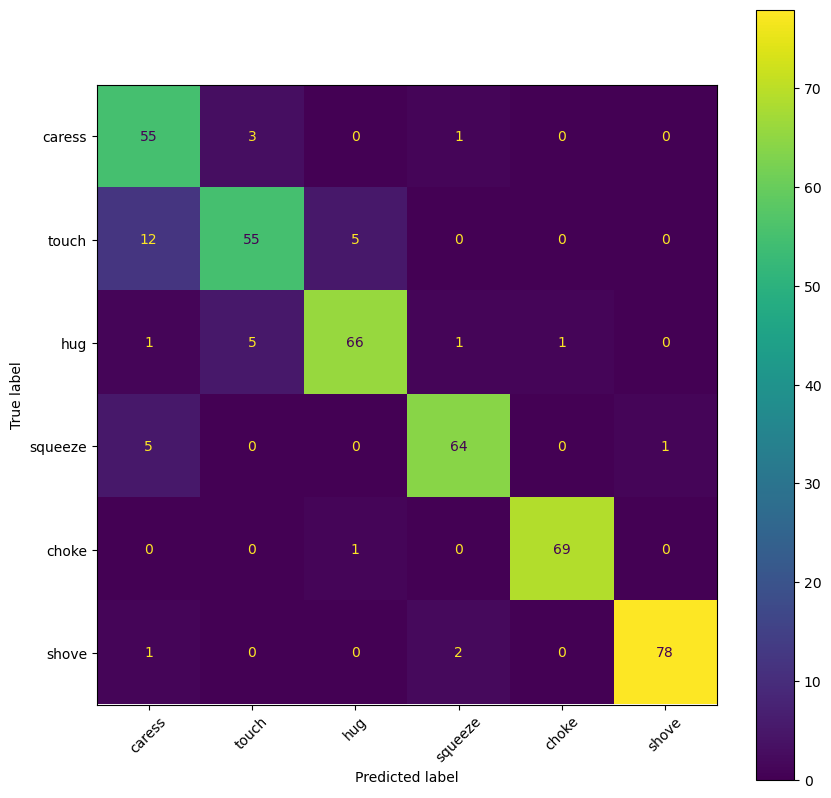

In [64]:
cm = confusion_matrix(Y_test, yhat, labels=target_names)
#cm = confusion_matrix(self.Y_val['question_1 type'], self.predicted_outputs[ :,0], labels=targets)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)

fig, ax = plt.subplots(figsize=(10,10))
print(cm)
disp.plot(ax=ax,xticks_rotation=45)